# Analyzing The Background and In Cell Fluorescence Intensities for the datasets from omnipose output

# Macro Analysis Comparing Cell and Background Intensities with Per Frame data Across Experiments (segmented by omnipose or pretrained ML)


This Script is intended to be used quickly following imaging to assess overall data collection methods. The data must first be segmented using the omnipose script with naming and folder structures.



In [2]:
import pandas as pd

# Load the datasets
df_biorep1 = pd.read_csv(r"C:\Users\Nikon\Downloads\Omni\image_post_omni_biorep1_curated\df_biorep1.csv")
df_biorep2 = pd.read_csv(r"C:\Users\Nikon\Downloads\Omni\image_post_omni_biorep2_curated\df_biorep2.csv")

# Combine both datasets
combined_df = pd.concat([df_biorep1, df_biorep2], ignore_index=True)

# Filter for the FISH signal only
fish_signal_df = combined_df[combined_df['signal'] == 'fish']

# Display the first few rows to understand the structure of the data
fish_signal_df.head()


# Focusing on rows where image_type is 'background'
background_data = fish_signal_df[fish_signal_df['image_type'] == 'background']

# Grouping the data by strain, time, and bioreplicate
grouped_background_data = background_data.groupby(['strain', 'time', 'biorep']).agg(['mean', 'median', 'std'])

# Display the grouped data for analysis
grouped_background_data.head()

TypeError: agg function failed [how->mean,dtype->object]

## Basing it on overall Experiment (Not Grouping based on condition)

C:\Users\Nikon\AppData\Local\Temp\ipykernel_21776\2083312636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str)
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

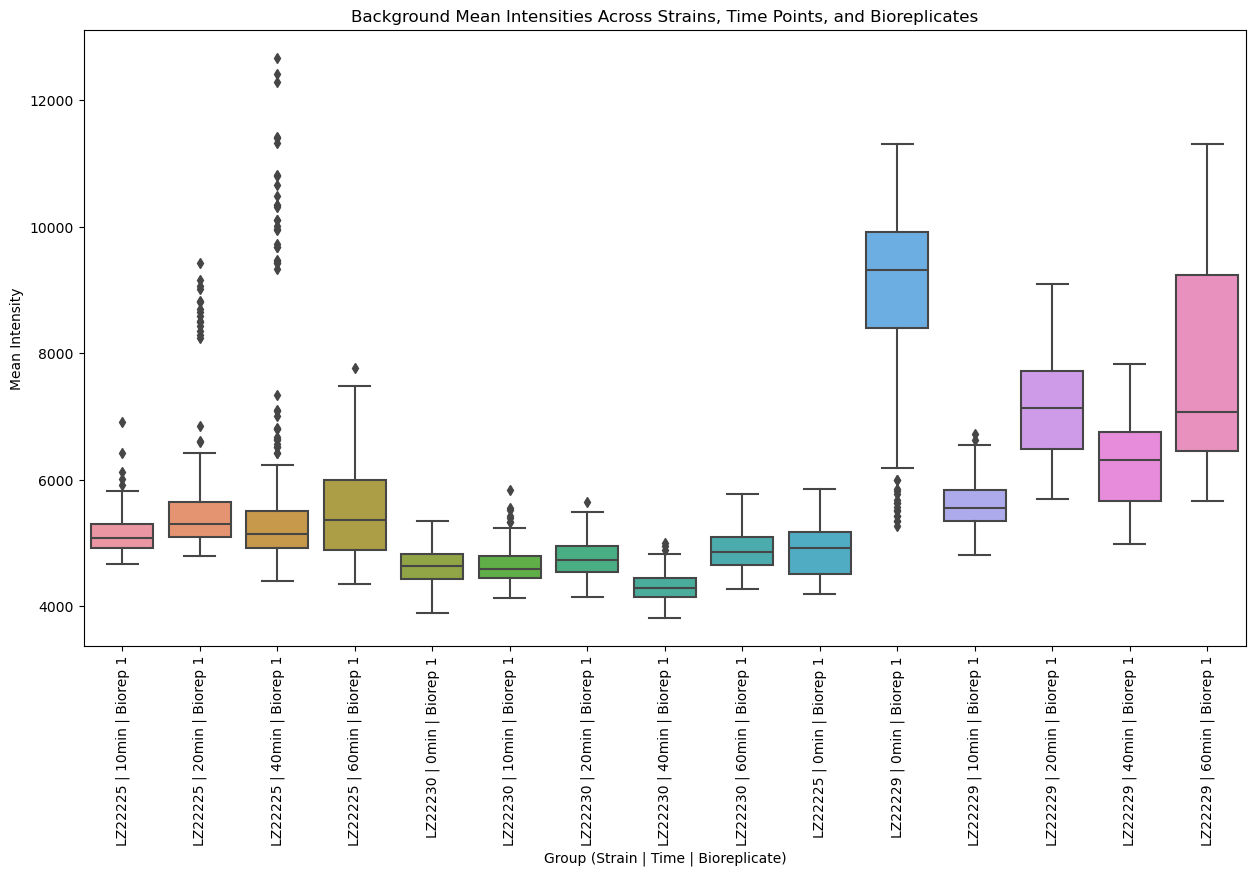

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for visualization
# We'll create a new column that combines strain, time, and bioreplicate for easier plotting
background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str)

# Plotting background mean intensities for each group
plt.figure(figsize=(15, 8))
sns.boxplot(x='group', y='mean', data=background_data)
plt.xticks(rotation=90)
plt.title('Background Mean Intensities Across Strains, Time Points, and Bioreplicates')
plt.xlabel('Group (Strain | Time | Bioreplicate)')
plt.ylabel('Mean Intensity')
plt.show()


#### Now plotting grouped by Zstack to see if theres a trend or explanation 

c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

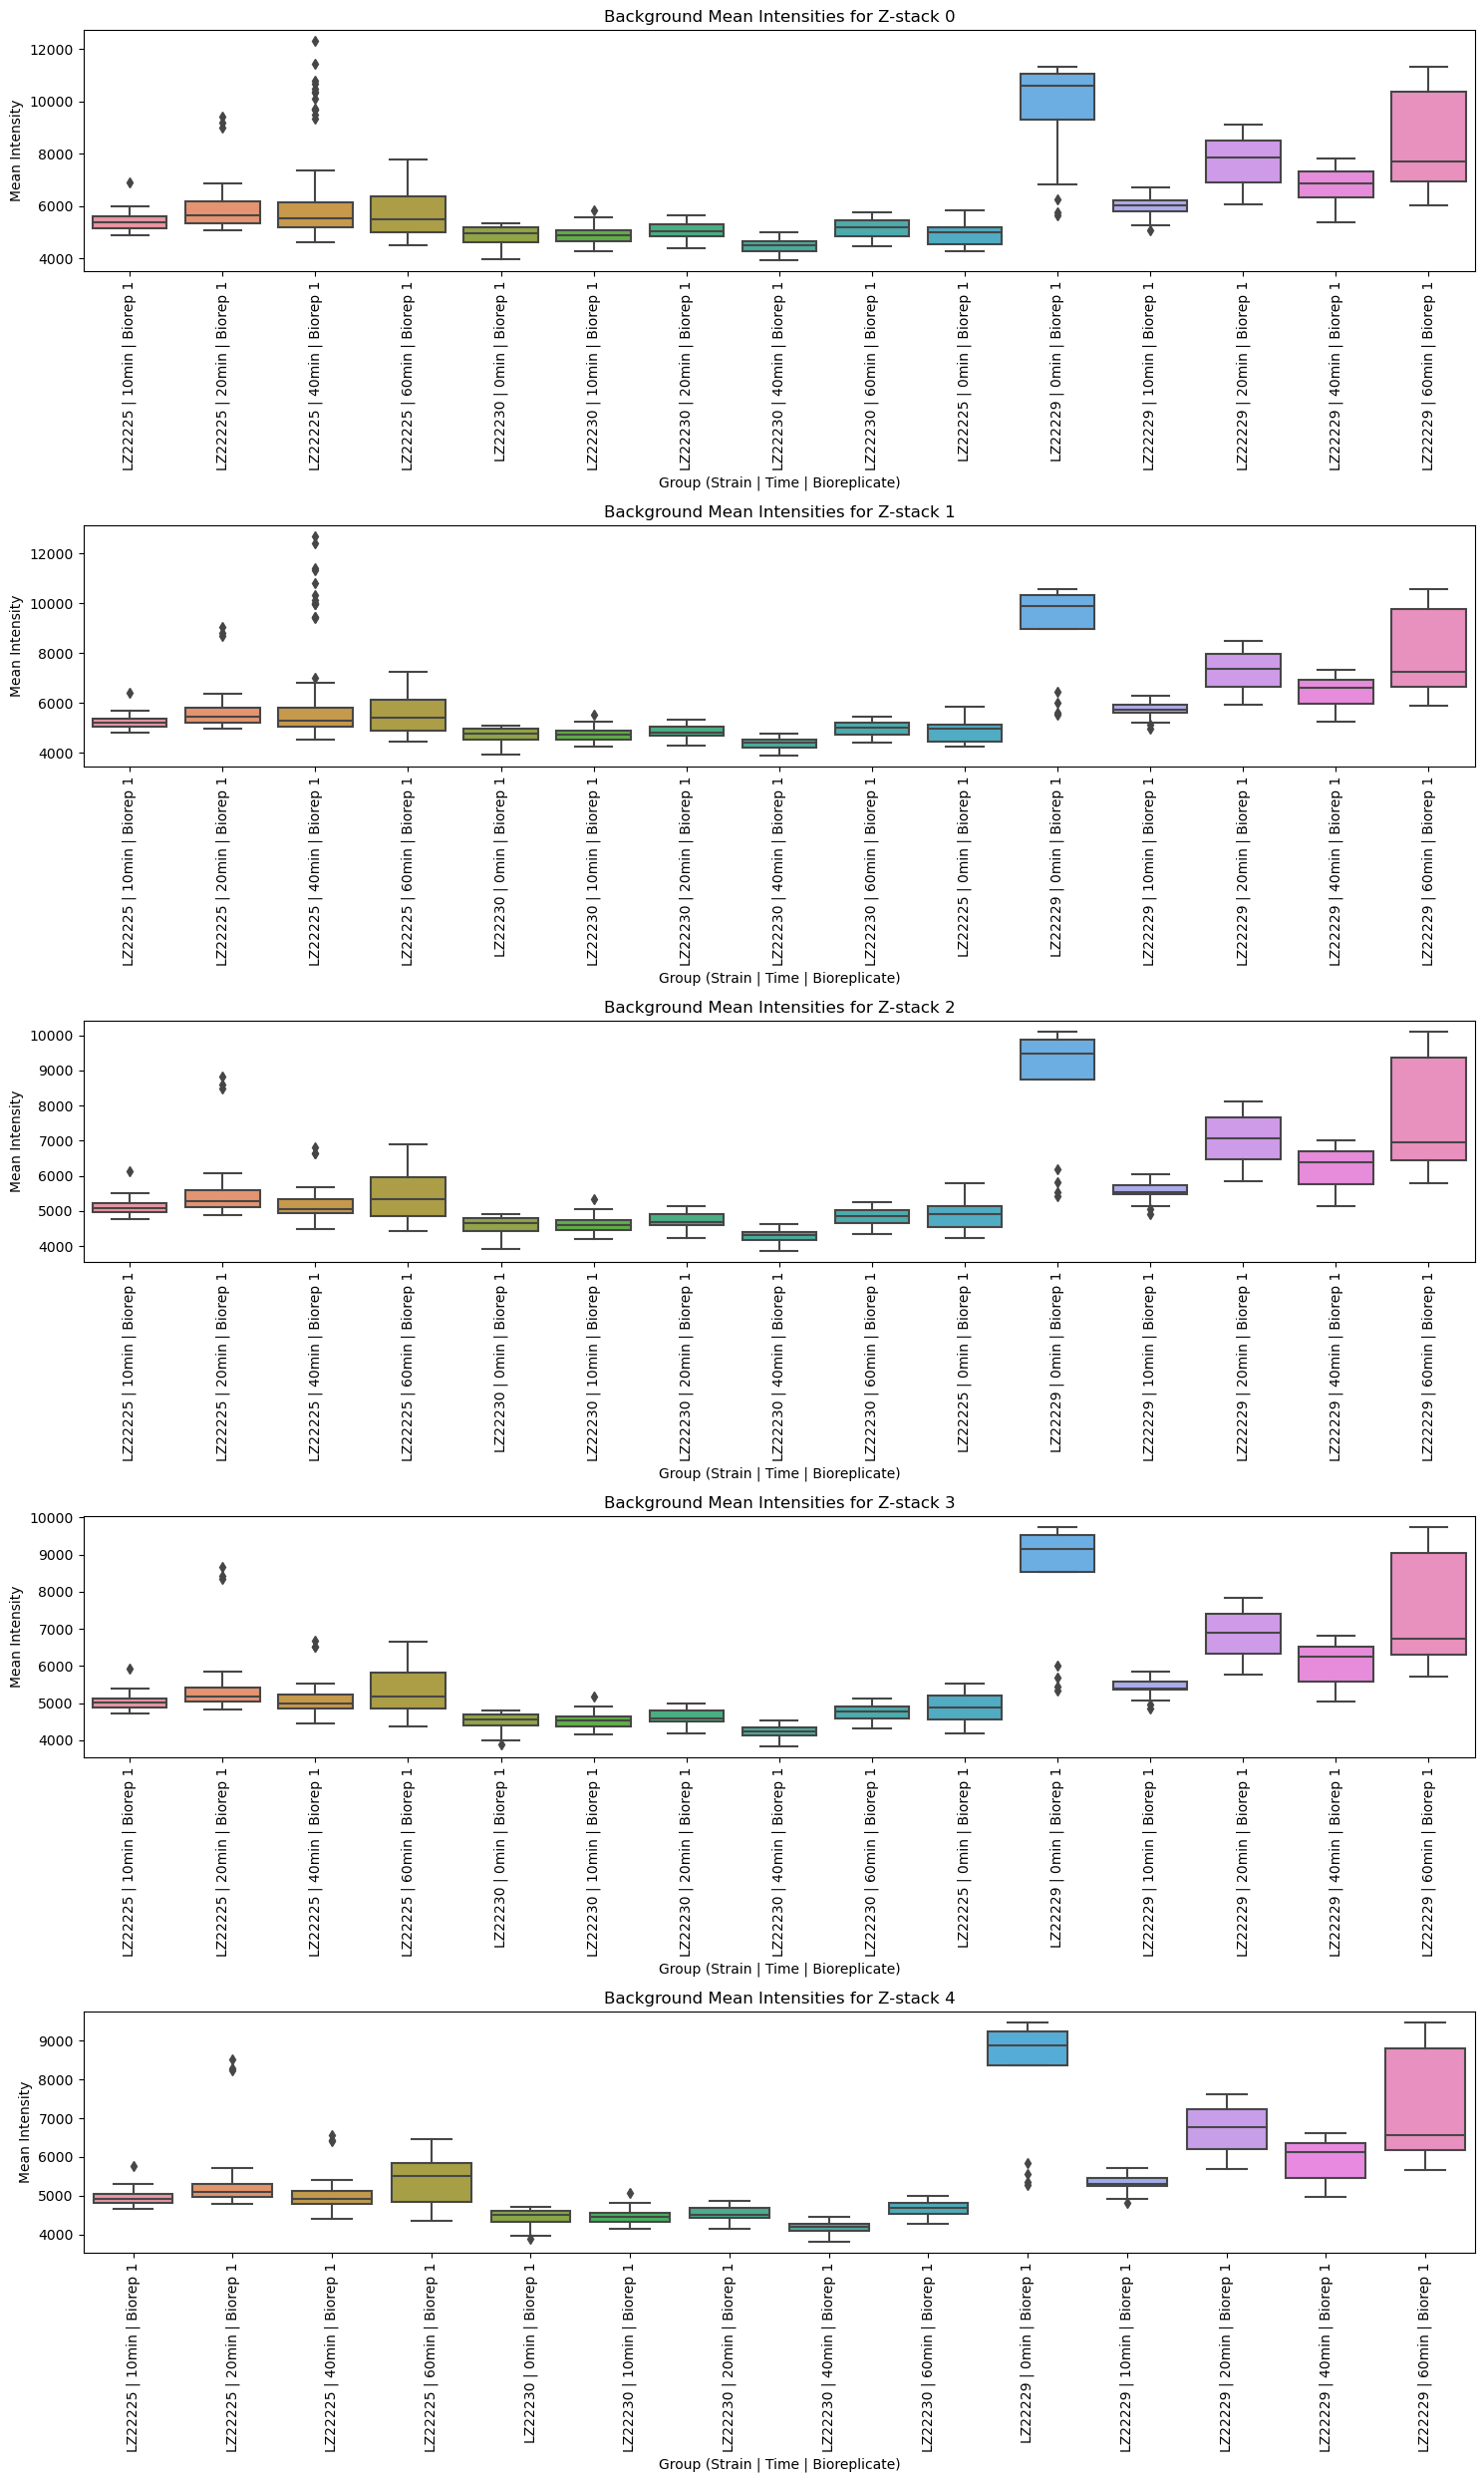

In [4]:
# Creating separate plots for each Z-stack
z_stacks = background_data['z_stack'].unique()

# Setting up the figure for multiple subplots
fig, axes = plt.subplots(len(z_stacks), 1, figsize=(15, 5 * len(z_stacks)))

# Looping through each Z-stack to create a plot
for i, z_stack in enumerate(z_stacks):
    # Filter data for the current Z-stack
    data_for_z_stack = background_data[background_data['z_stack'] == z_stack]

    # Plot
    sns.boxplot(x='group', y='mean', data=data_for_z_stack, ax=axes[i])
    axes[i].set_title(f'Background Mean Intensities for Z-stack {z_stack}')
    axes[i].set_xlabel('Group (Strain | Time | Bioreplicate)')
    axes[i].set_ylabel('Mean Intensity')
    axes[i].tick_params(axis='x', rotation=90)

# Adjusting layout
plt.tight_layout()
plt.show()


## Looking at differences in infected vs uninfected with the experiment 

C:\Users\Nikon\AppData\Local\Temp\ipykernel_21776\3135339275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_z_stack['group_condition'] = data_for_z_stack['group'] + ' | ' + data_for_z_stack['condition']
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype

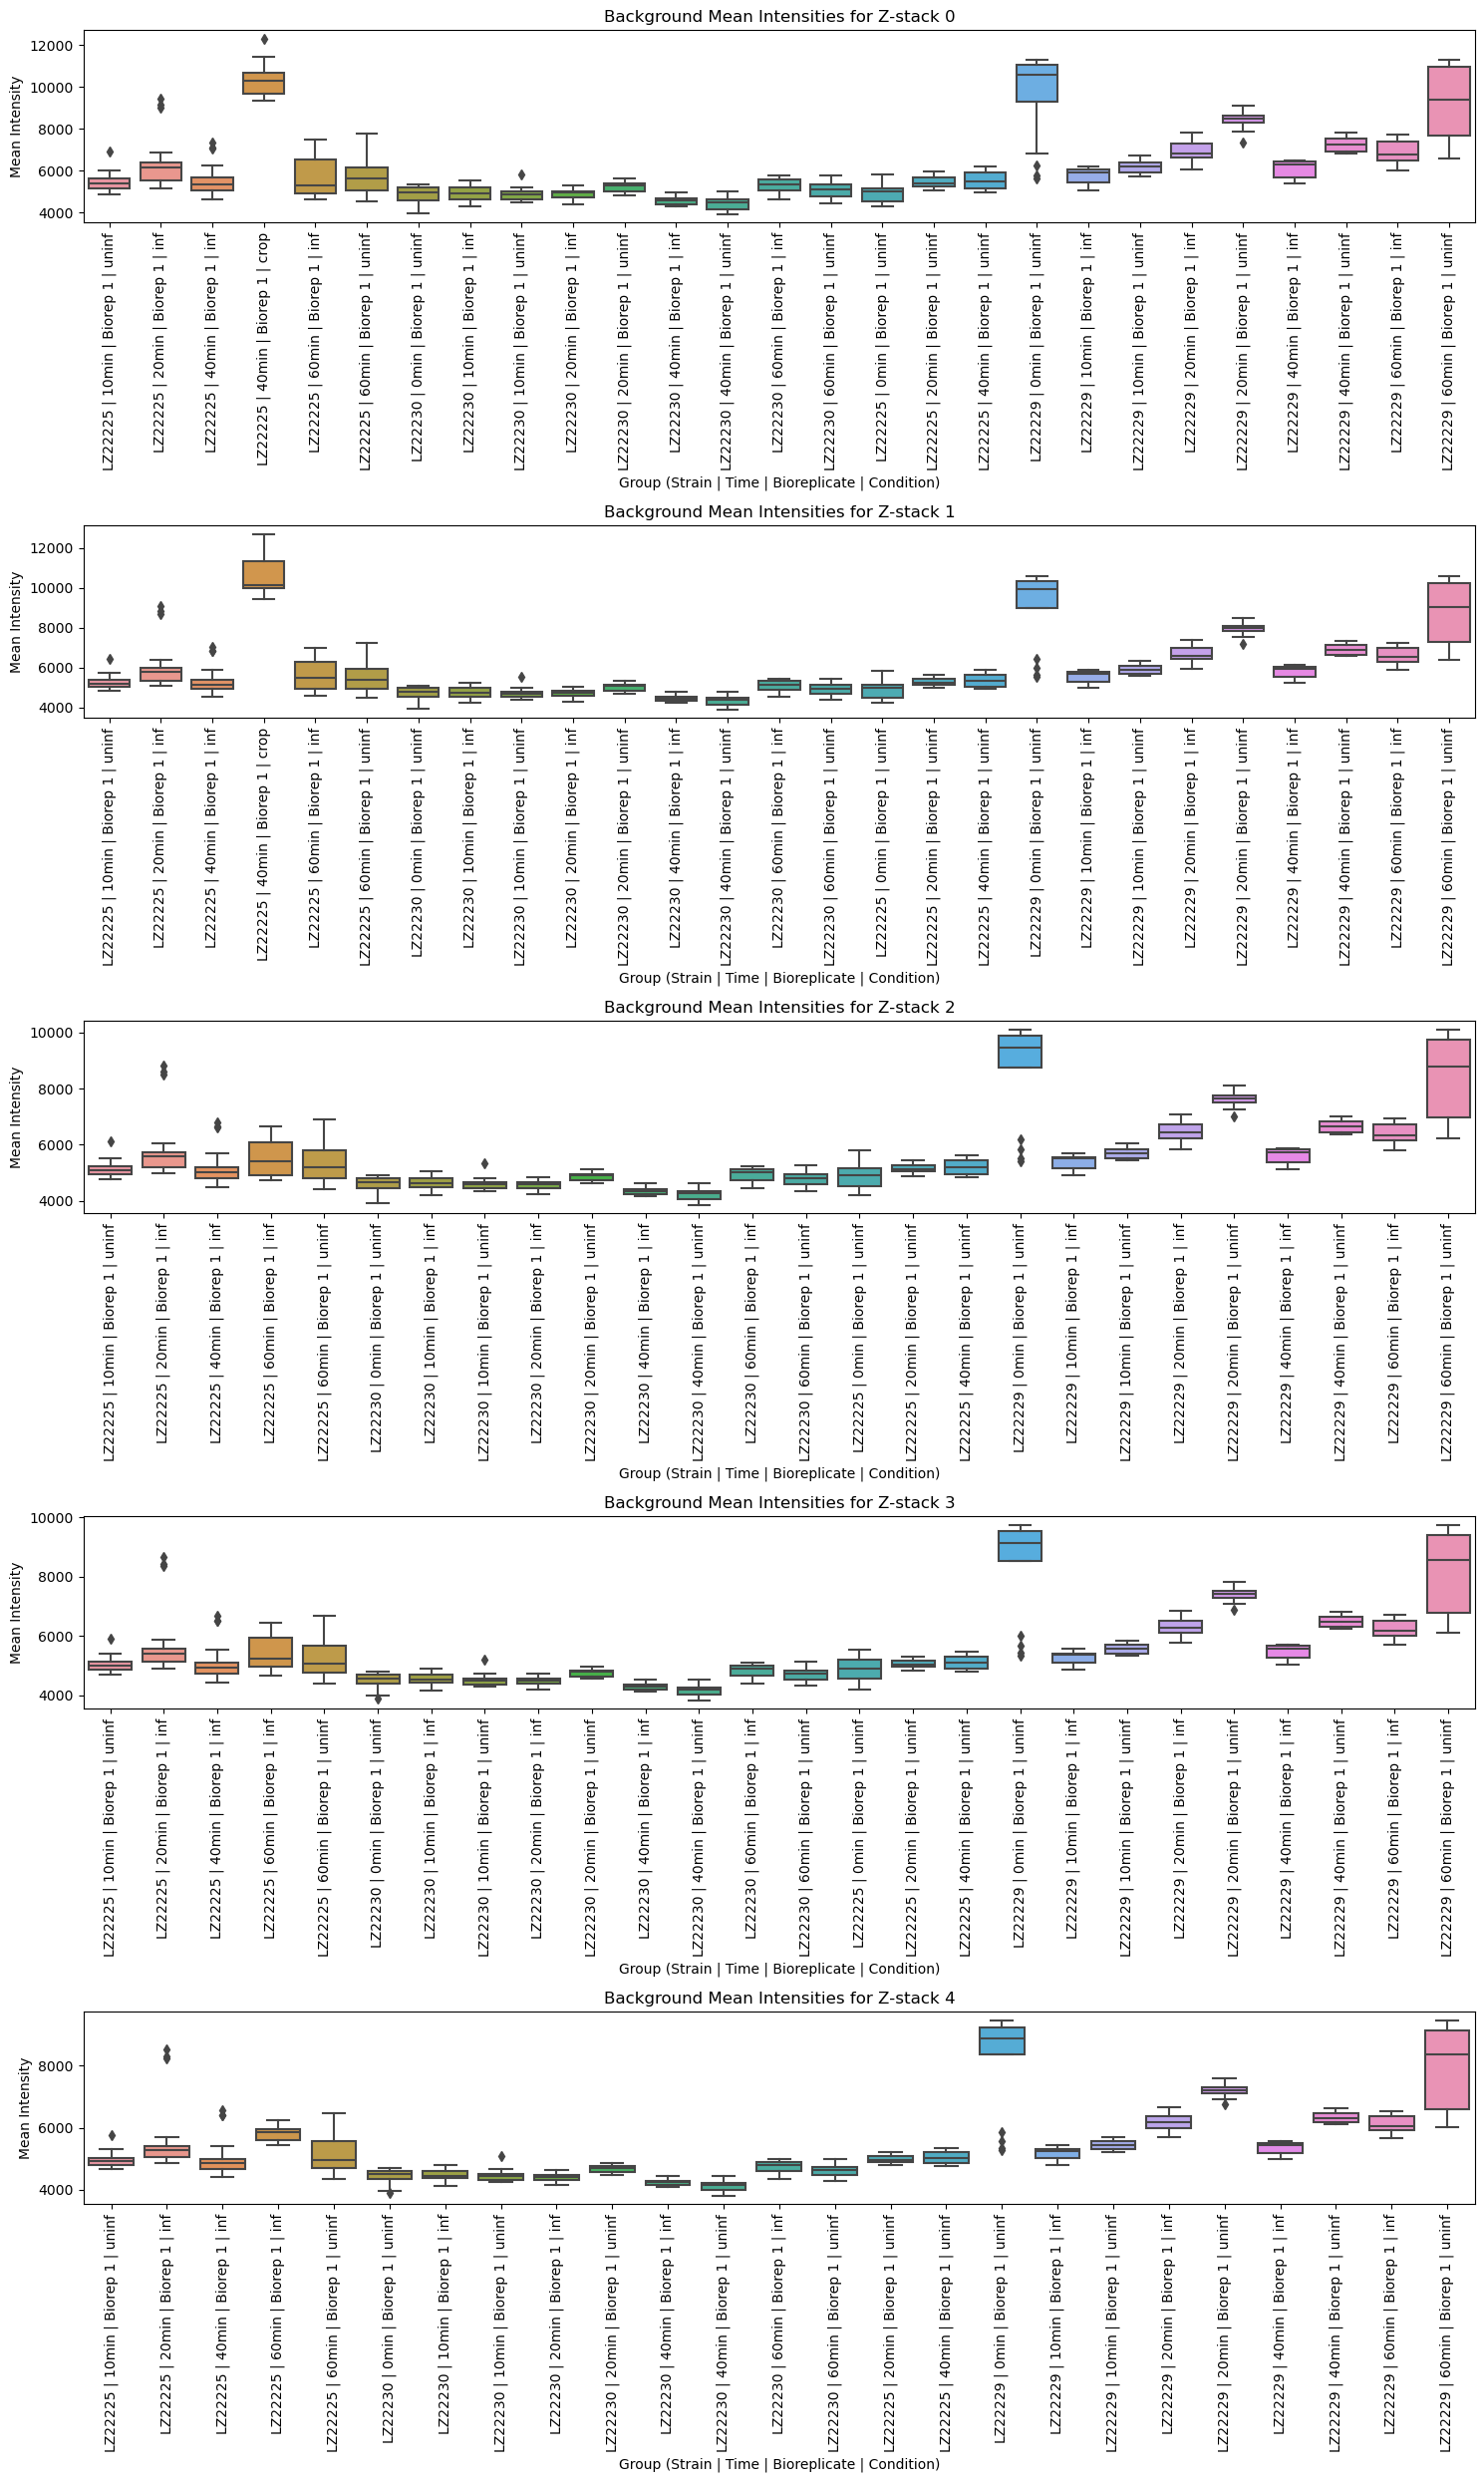

In [5]:
# Creating separate plots for each Z-stack, now also grouped by condition
fig, axes = plt.subplots(len(z_stacks), 1, figsize=(15, 5 * len(z_stacks)))

# Looping through each Z-stack to create a plot, now considering 'condition'
for i, z_stack in enumerate(z_stacks):
    # Filter data for the current Z-stack
    data_for_z_stack = background_data[background_data['z_stack'] == z_stack]

    # Grouping based on condition as well
    data_for_z_stack['group_condition'] = data_for_z_stack['group'] + ' | ' + data_for_z_stack['condition']

    # Plot
    sns.boxplot(x='group_condition', y='mean', data=data_for_z_stack, ax=axes[i])
    axes[i].set_title(f'Background Mean Intensities for Z-stack {z_stack}')
    axes[i].set_xlabel('Group (Strain | Time | Bioreplicate | Condition)')
    axes[i].set_ylabel('Mean Intensity')
    axes[i].tick_params(axis='x', rotation=90)

# Adjusting layout
plt.tight_layout()
plt.show()


In [6]:
# Calculating descriptive statistics for key metrics across different groupings



# Recalculating descriptive statistics excluding kurtosis
grouped_stats_no_kurtosis = fish_signal_df.groupby(['strain', 'time', 'biorep', 'condition', 'z_stack']).agg(['mean', 'median', 'std', 'skew'])

# Focusing on the 'mean' intensity metric
grouped_mean_intensity_stats_no_kurtosis = grouped_stats_no_kurtosis['mean']

# Displaying the descriptive statistics for the mean intensity
grouped_mean_intensity_stats_no_kurtosis.head()

# Exploratory Data Analysis on the descriptive statistics
# We will visualize some of these statistics to look for trends

# Preparing a simpler DataFrame for visualization
eda_df = grouped_mean_intensity_stats_no_kurtosis.reset_index()

# Visualizing Mean Intensities Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='mean', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Mean Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Mean Intensity')
plt.xticks(rotation=45)
plt.show()

# Visualizing Standard Deviation Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='std', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Standard Deviation of Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.show()

# Visualizing Skewness Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='skew', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Skewness of Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [7]:
# Getting the count of unique combinations of the specified columns
unique_combinations_count = fish_signal_df.groupby(['condition', 'strain', 'biorep', 'time', 'image_type']).size().reset_index(name='count')

unique_combinations_count

,condition,strain,biorep,time,image_type,count
0,crop,LZ22225,1,40min,background,26
1,crop,LZ22225,1,40min,cell,26
2,inf,LZ22225,1,20min,background,125
3,inf,LZ22225,1,20min,cell,125
4,inf,LZ22225,1,40min,background,185
5,inf,LZ22225,1,40min,cell,185
6,inf,LZ22225,1,60min,background,160
7,inf,LZ22225,1,60min,cell,160
8,inf,LZ22229,1,10min,background,55
9,inf,LZ22229,1,10min,cell,55


In [8]:
#### Analyzing based on differences in mean intensity infected and uninfected


# Filtering for 'inf' and 'uninf' conditions separately
inf_conditions = fish_signal_df[fish_signal_df['condition'] == 'inf']
uninf_conditions = fish_signal_df[fish_signal_df['condition'] == 'uninf']


# Calculating the differences in mean intensities between 'inf' and 'uninf' conditions for the specified combinations

# Calculating mean intensities for each combination in the 'inf' and 'uninf' datasets
mean_inf = inf_conditions.groupby(['strain', 'biorep', 'time', 'image_type'])['mean'].mean().reset_index(name='mean_inf')
mean_uninf = uninf_conditions.groupby(['strain', 'biorep', 'time', 'image_type'])['mean'].mean().reset_index(name='mean_uninf')

# Merging the mean intensities for 'inf' and 'uninf' conditions
merged_means = pd.merge(mean_inf, mean_uninf, on=['strain', 'biorep', 'time', 'image_type'])

# Calculating the difference in mean intensities
merged_means['mean_intensity_diff'] = merged_means['mean_inf'] - merged_means['mean_uninf']

# Displaying the results
merged_means[['strain', 'biorep', 'time', 'image_type', 'mean_intensity_diff']]




,strain,biorep,time,image_type,mean_intensity_diff
0,LZ22225,1,20min,background,723.205972
1,LZ22225,1,20min,cell,1166.754774
2,LZ22225,1,40min,background,-53.184072
3,LZ22225,1,40min,cell,89.836293
4,LZ22225,1,60min,background,179.420416
5,LZ22225,1,60min,cell,403.518819
6,LZ22229,1,10min,background,-336.274873
7,LZ22229,1,10min,cell,-424.642656
8,LZ22229,1,20min,background,-1195.622318
9,LZ22229,1,20min,cell,-1447.289320
